In [3]:
import math
import numpy as np
import nupack
from nupack import State
import scipy.stats
from nupack import Model

In [5]:
# Gives a structure matrix from dotprint on string form
def structure_matrix(seq):
    lengd = len(seq)
    leftB = []
    rightB = []
    Smatrix = np.zeros([lengd,lengd])
    
    for i in range(lengd):
        if seq[i] == '(':
            leftB.append(i)
        elif seq[i] == ')':
            rightB.append(i)
        
    for x,y in list(enumerate(leftB)):
        Smatrix[y,rightB[len(rightB)-1-x]] = 1
        Smatrix[rightB[len(rightB)-1-x], y] = 1
    Smatrix += np.diag(1-Smatrix.sum(0))
    return Smatrix

In [6]:
# Gives pair probability matrix (takes in stationary distribution, secondary structure and placement (i))
def pair_probability(small_pi, w, i):
    '''Takes in secondary structure and stationary distribution and gives out the pair probability matrix'''
    P = small_pi[i]*structure_matrix(w)
    return P

In [7]:
# Run trajectories for a specific timelength and collect final states as well as pair probabilty matrices

class Stop_Condition:
    def __init__(self, stop_time):
        self.time = 0.0
        self.states = []
        self.timesteps = []
        self.stop_time = stop_time

    def __call__(self, state, timestep):
        self.time += timestep
        self.states.append(state.dp)
        self.timesteps.append(timestep)
        return self.time >= self.stop_time
    
State_collector = {}
PP_Matrix_Collector = []


for timeToStop in np.arange(0, 6e-4, 2e-4):
    State_vec = []
    PP_vec = []
    for i in range(10):
        # Put in initial conditions:
        Define_State = nupack4.State('TTAACCCACGCCGAATCCTAGACTCAAAGTAGTCTAGGATTCGGCGTG+AGTCTAGGATTCGGCGTGGGTTAA+AGTCTAGGATTCGGCGTGGGTTAACACGCCGAATCCTAGACTACTTTG', '......((((((((((((((((((......))))))))))))))))))+........................+((((((((((((((((((......))))))))))))))))))......', model=Model(T=298, gt = True), kind ='slow')
        w = Define_State
        w.run(Stop_Condition(float(timeToStop)))
        State_vec.append(w)
        
        all_states = list(nupack4.State('TTAACCCACGCCGAATCCTAGACTCAAAGTAGTCTAGGATTCGGCGTG+AGTCTAGGATTCGGCGTGGGTTAA+AGTCTAGGATTCGGCGTGGGTTAACACGCCGAATCCTAGACTACTTTG', '......((((((((((((((((((......))))))))))))))))))+........................+((((((((((((((((((......))))))))))))))))))......', model=Model(T=298, gt = True), kind ='slow').enumerated())
        small_pi = np.asarray([w.boltz for w in all_states])
        small_pi /= small_pi.sum()
        
        for k in range(len(all_states)):
            if all_states[k].dp == w.dp:
                i = k
        PP_vec.append(pair_probability(small_pi, w.dp, i))
    State_collector[timeToStop] = State_vec
    PP_Matrix_Collector.append(PP_vec)
    

NameError: name 'nupack4' is not defined

In [5]:
# Takes in all the PP matrices, the discovered macrostates from small box, all the possible states and the stationary 
# distribution. Finds the macrostate that is closest to each PP matrix and gives out a counter for the macro states.
def change_to_macro(PP_Matrix_Collector, macro_States, all_states, small_pi):
    
    P_2 = []
    
    for i in range(len(macro_States)):
        for k in range(len(all_states)):
            if macro_States[i] == all_states[k].dp:
                P_2.append(pair_probability(small_pi, macro_States[i], k))
    
    #print(P_2)
    #print(macro_States)
    
    
    TimeCollector = []
    for i in range(len(PP_Matrix_Collector)):                         # Every time step
        vec_counter = np.zeros(len(macro_States))
        for j in range(len(PP_Matrix_Collector[i])):                  # Every iteration, matrix
            P_1 = PP_Matrix_Collector[i][j]
            diff_vec = np.zeros(len(macro_States))
            for k in range(len(P_2)):
                diff_vec[k] = np.linalg.norm((P_1 - P_2[k]))
            vec_counter[np.argmin(diff_vec)] += 1
            #print('Thetta er min af diff_vec:')
            #print(np.argmin(diff_vec))
        TimeCollector.append(vec_counter)      
    
    return TimeCollector


In [4]:
macro_States = ['.....(((((........)))))', '..........(((((...)))))', '(((((.(.((...)).).)))))','...(((......)))........']

TimeCollector = change_to_macro(PP_Matrix_Collector, macro_States, all_states, small_pi)

NameError: name 'change_to_macro' is not defined

NameError: name 'TimeCollector' is not defined

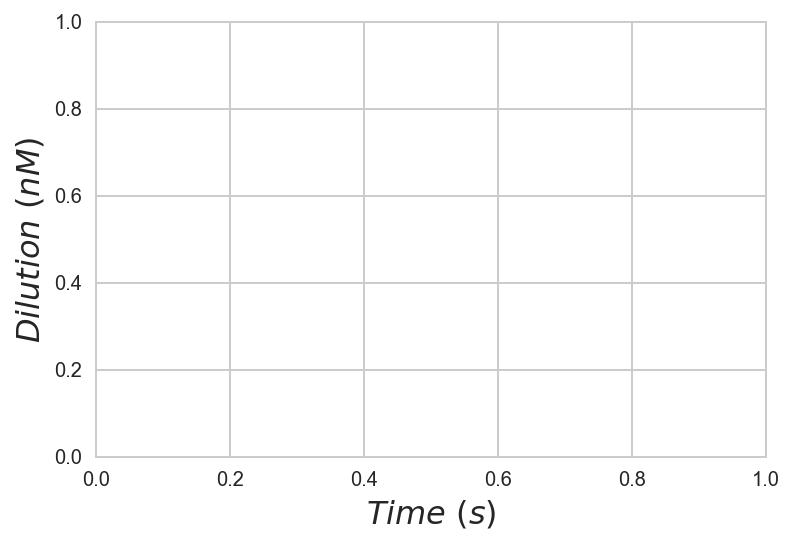

In [6]:
# Draw the population of macrostate at each point by assessment of closes PP matrix

import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', palette=colors, rc={'axes.labelsize': 16})

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

t = np.arange(0, 600e-4, 25e-4)


# Puts up basis (grid defined)
fig, ax = plt.subplots(1, 1)
# Setur merkingar a asa
ax.set_xlabel(r'$Time \ ( s )$')
ax.set_ylabel(r'$Dilution \ (nM)$');

dis = {}
for i in range(len(TimeCollector[0])):
    dis[i] = []
        
for j in range(len(TimeCollector)):    
    for i in range(len(TimeCollector[0])):
        dis[i].append(TimeCollector[j][i])

for i in range(len(dis)):
    _ = ax.plot(t, dis[i]/sum(TimeCollector[i]))
#ax.set_xscale('log')                             # To change to log-scale

ax.legend(('Macrostate 1', 'Macrostate 2', 'Macrostate 3','Macrostate 4'), loc='upper right');
#plt.savefig('TrajectoriesToMacroStates_10micro_1300_0.15timaskerf.png', bbox_inches='tight')      # to save image
    

In [8]:
######################################################################################################################
# The rest of this notebook is old print out and practice.
TimeCollector

NameError: name 'TimeCollector' is not defined

In [ ]:
np.shape(PP_Matrix_Collector)

P_2 = []
P_2.append(PP_Matrix_Collector[0][0])
P_2.append(PP_Matrix_Collector[0][0])
P_2.append(PP_Matrix_Collector[0][0])

TimeCollector = []
for i in range(len(PP_Matrix_Collector)):                         # Every time step
    vec_counter = np.zeros(len(macro_States))
    for j in range(len(PP_Matrix_Collector[i])):                  # Every iteration, matrix
        P_1 = PP_Matrix_Collector[i][j]
        diff_vec = np.zeros(len(macro_States))
        for k in range(len(P_2)):
            diff_vec[k] = np.linalg.norm((P_1 - P_2[k]))
        vec_counter[np.argmin(diff_vec)] += 1
    TimeCollector.append(vec_counter)

In [ ]:
geyma300_1
geyma300_1_100iloopu

In [ ]:
TimeCollector

In [10]:
k = nupack4.State('TTAACCCACGCCGAATCCTAGACTCAAAGTAGTCTAGGATTCGGCGTG+AGTCTAGGATTCGGCGTGGGTTAA+AGTCTAGGATTCGGCGTGGGTTAACACGCCGAATCCTAGACTACTTTG', '......((((((((((((((((((......))))))))))))))))))+........................+((((((((((((((((((......))))))))))))))))))......', model=Model(T=298, gt = True), kind ='slow')


NameError: name 'nupack4' is not defined

In [34]:
list(k)

TypeError: 'method' object is not iterable